In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In [8]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q, n_b)

In [12]:
for j in range(n):
    qc_output.measure(j,j)

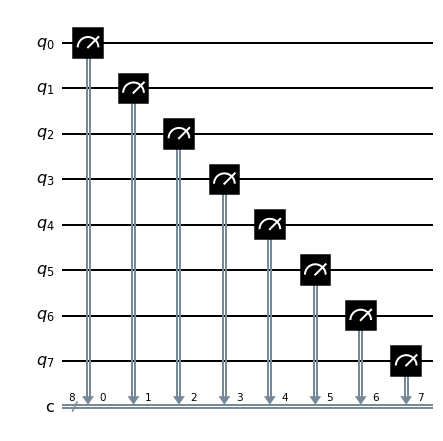

In [14]:
qc_output.draw(output='mpl')

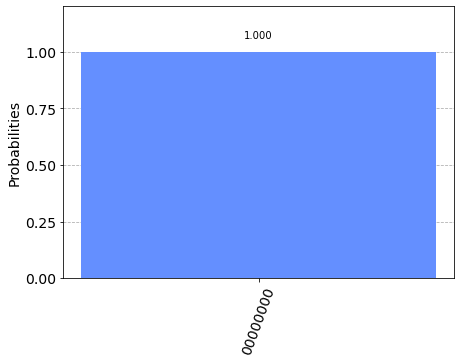

In [15]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_output)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)

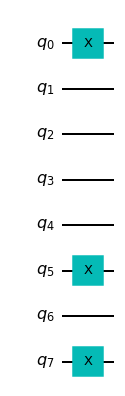

In [20]:
qc_encode = QuantumCircuit(n)
qc_encode.x(0)
qc_encode.x(5)
qc_encode.x(7)
qc_encode.draw(output='mpl')

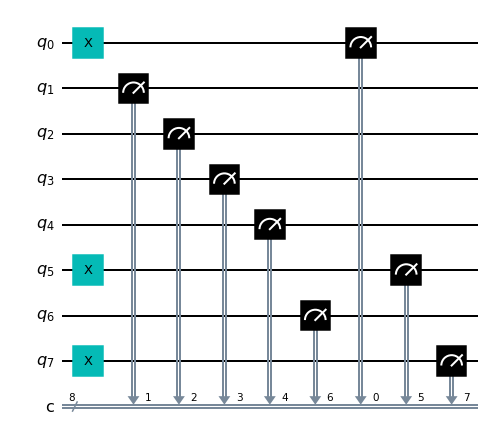

In [21]:
qc = qc_encode + qc_output
qc.draw(output='mpl')

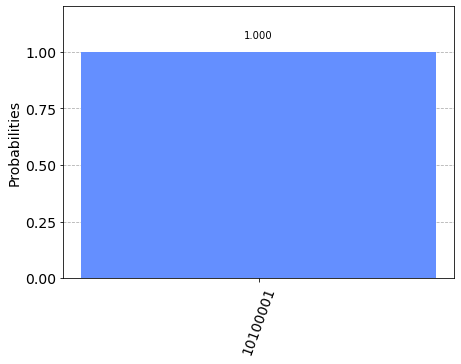

In [22]:
job = assemble(qc)
counts = sim.run(job).result().get_counts()
plot_histogram(counts)

In [25]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}

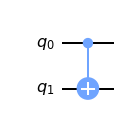

In [27]:
qc_cnot = QuantumCircuit(2)
qc_cnot.cx(0,1)
qc_cnot.draw(output='mpl')

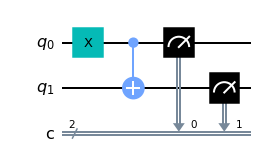

In [29]:
qc1 = QuantumCircuit(2,2)
qc1.x(0)
qc1.cx(0,1)
qc1.measure(0,0)
qc1.measure(1,1)
qc1.draw(output='mpl')

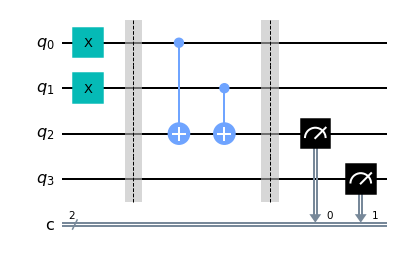

In [30]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubis 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubits 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1)

qc_ha.draw(output='mpl')

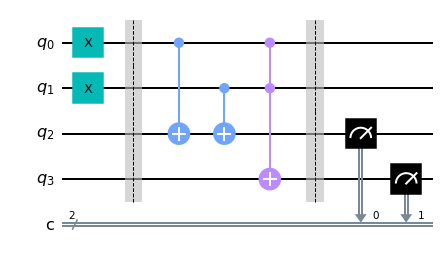

In [31]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output='mpl')

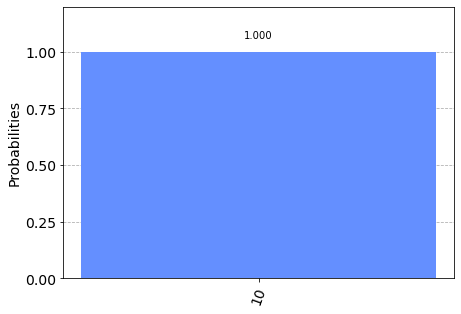

In [33]:
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)